In [1]:
# import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
# Exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
# Initialize LabelEncoder for categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

# Encoding categorical variables
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
df['route'] = label_encoder.fit_transform(df['route'])
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows to check the preprocessing
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,1.957530,-0.119353,-0.381764,Sat,0,61,1,0,0,-1.174175,0
1,1,0,2,0.299164,-0.089844,-1.120780,Sat,0,61,0,0,0,-1.174175,0
2,2,0,2,1.747470,-0.030824,1.465775,Wed,0,36,1,1,0,-1.174175,0
3,1,0,2,0.122272,0.234761,-0.936026,Sat,0,61,0,0,1,-1.174175,0
4,2,0,2,-0.187290,-0.030824,1.096267,Wed,0,36,1,0,1,-1.174175,0


In [6]:
# feature engineering
# Create a new feature that sums up the service requests
df['total_services_requested'] = (df['wants_extra_baggage'] + 
                                  df['wants_preferred_seat'] + 
                                  df['wants_in_flight_meals'])


In [7]:
# Create a binary feature indicating if the flight is on a weekend
df['is_weekend_flight'] = df['flight_day'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)


In [8]:
# Create a new feature that captures the ratio of purchase lead to length of stay
df['booking_lead_ratio'] = df['purchase_lead'] / (df['length_of_stay'] + 1)  

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_services_requested,is_weekend_flight,booking_lead_ratio
0,2,0,2,1.957530,-0.119353,-0.381764,Sat,0,61,1,0,0,-1.174175,0,1,1,2.222832
1,1,0,2,0.299164,-0.089844,-1.120780,Sat,0,61,0,0,0,-1.174175,0,0,1,0.328695
2,2,0,2,1.747470,-0.030824,1.465775,Wed,0,36,1,1,0,-1.174175,0,2,0,1.803048
3,1,0,2,0.122272,0.234761,-0.936026,Sat,0,61,0,0,1,-1.174175,0,1,1,0.099024
4,2,0,2,-0.187290,-0.030824,1.096267,Wed,0,36,1,0,1,-1.174175,0,2,0,-0.193247


In [10]:
# encoding flight_day using label encoder
df['flight_day'] = label_encoder.fit_transform(df['flight_day'])

In [11]:
# balancing the dataset
from imblearn.over_sampling import SMOTE

# Separate features and target variable
x = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Apply SMOTE to balance the target classes
smote = SMOTE(random_state=42)
x_bal, y_bal = smote.fit_resample(x, y)


In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)


In [13]:
# Training our moddel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9007584220118761
Confusion Matrix:
[[7689  755]
 [ 933 7632]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8444
           1       0.91      0.89      0.90      8565

    accuracy                           0.90     17009
   macro avg       0.90      0.90      0.90     17009
weighted avg       0.90      0.90      0.90     17009



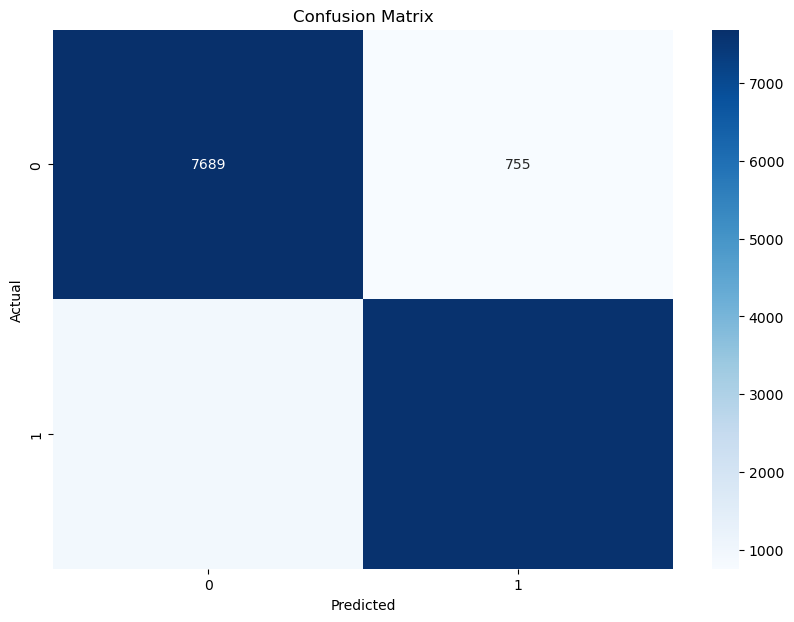

In [14]:
 # visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using StratifiedKFold
cv_scores = cross_val_score(rf_model, x_bal, y_bal, cv=skf)

# Output the cross-validation scores and mean score
print(f"Stratified Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Stratified Cross-validation scores: [0.89970016 0.89482039 0.89734846 0.90116997 0.89463782]
Mean cross-validation score: 0.8975353593723028


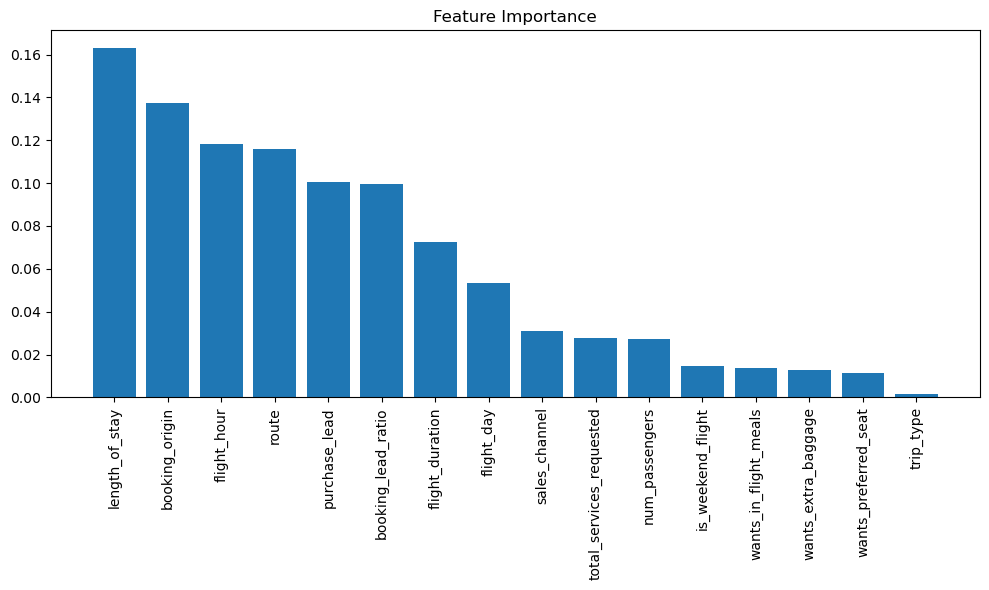

In [16]:
# visualizing importance of features
# Get feature importance from the model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = x.columns

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


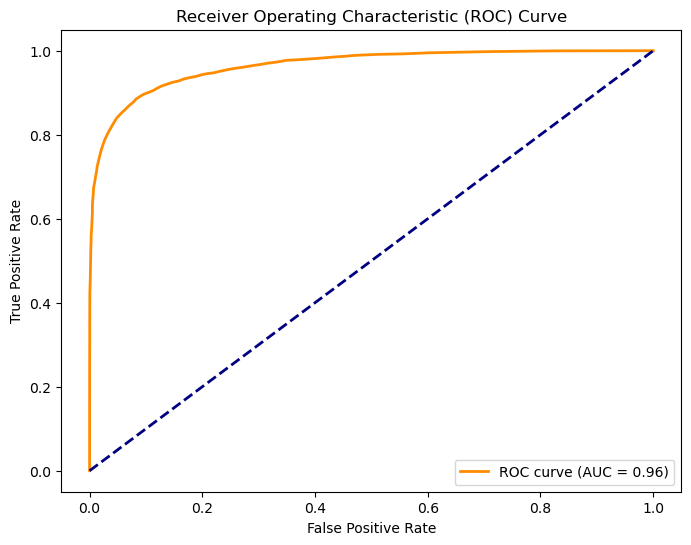

In [17]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
